## Costos - Fabricación
---

A partir de los costos de fabricación de 4.000 mesas que se detallan:


- Materia prima directa: $100.000
- Mano de obra directa: $80.000
- Mano de obra indirecta: $10.000
- Materiales indirectos: $4.000
- Gastos de administración: $2.000
- Fuerza motriz: $11.000
- Depreciación de herramientas: $3.000
- Depreciación de edificios Dpto.Producción: $2.000
- Depreciación de maquinaria: $4.000
- Seguros de fábrica: $4.000
- Otros CIF: $4.000

---

#### Importaciones y configuración

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

In [14]:
# Configuración de estilo profesional
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [15]:
# Paleta de colores
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#F0F3BD']
mp_color = '#2E86AB'    # Azul para Materia Prima
mod_color = '#A23B72'   # Magenta para Mano de Obra Directa
cif_color = '#F18F01'   # Naranja para CIF
accent_color = '#C73E1D' # Rojo para acentos

#### Definición de datos

In [16]:
# Datos proporcionados
datos = {
    "Costos Directos": {
        "Materia prima directa": 100000,
        "Mano de obra directa": 80000
    },
    "Costos Indirectos de Fabricación": {
        "Mano de obra indirecta": 10000,
        "Materiales indirectos": 4000,
        "Fuerza motriz": 11000,
        "Depreciación de herramientas": 3000,
        "Depreciación de edificios Dpto. Producción": 2000,
        "Depreciación de maquinaria": 4000,
        "Seguros de fábrica": 4000,
        "Otros CIF": 4000
    },
    "Gastos de Administración": {
        "Gastos de administración": 2000
    },
    "Producción": {
        "Unidades producidas": 4000
    }
}

In [17]:
def crear_df_detalle(categoria, nombre_categoria):
    """Crea DataFrame con detalle de una categoría"""
    df = pd.DataFrame(list(datos[categoria].items()), 
                     columns=['Concepto', 'Monto ($)'])
    total = pd.DataFrame([{'Concepto': f'TOTAL {nombre_categoria}', 
                          'Monto ($)': df['Monto ($)'].sum()}])
    return pd.concat([df, total], ignore_index=True)


#### 1. Costo Primo (CP)
---

\begin{align*}
\text{Costo Primo Total} &= \text{Materia Prima Directa} + \text{Mano de Obra Directa} \\
\\
\end{align*}

In [25]:
# Costo Primo = MP + MOD
mp = datos["Costos Directos"]["Materia prima directa"]
mod = datos["Costos Directos"]["Mano de obra directa"]
costo_primo = mp + mod

print(f"   - Materia Prima Directa: ${mp:>,.2f}")
print(f"   - Mano de Obra Directa: ${mod:>,.2f}")
print("=" * 50)
print(f"✅ Costo Primo (MP + MOD): ${costo_primo:>,.2f}")
print("=" * 50)

   - Materia Prima Directa: $100,000.00
   - Mano de Obra Directa: $80,000.00
✅ Costo Primo (MP + MOD): $180,000.00


#### 2. Costo de Conversión
---
Los costos indirectos de Fabricación se calculan:

\begin{align*}
\text{CIF} &= \sum \text{Costos Indirectos de Fabricación} \\
\\
\end{align*}

Componentes del CIF:

- Mano de obra indirecta: $10,000
- Materiales indirectos: $4,000
- Fuerza motriz: $11,000
- Depreciación de herramientas: $3,000
- Depreciación de edificios: $2,000
- Depreciación de maquinaria: $4,000
- Seguros de fábrica: $4,000
- Otros CIF: $4,000


Luego, el costo de conversión se va a calcular como: 
\begin{align*}
\text{Costo de Conversión Total} &= \text{Mano de Obra Directa} + \text{CIF} \\
\end{align*}


In [ ]:
# CIF Total (suma de todos los costos indirectos de fabricación)
cif_total = sum(datos["Costos Indirectos de Fabricación"].values())
print(f"\n Costos Indirectos de Fabricación (CIF): ${cif_total:>,.2f}")

print("=" * 50)
# Costo de Conversión = MOD + CIF
costo_conversion = mod + cif_total
print(f"\n✅ Costo de Conversión (MOD + CIF): ${costo_conversion:>,.2f}")
print("=" * 50)


✅ Costos Indirectos de Fabricación (CIF): $42,000.00

✅ Costo de Conversión (MOD + CIF): $122,000.00


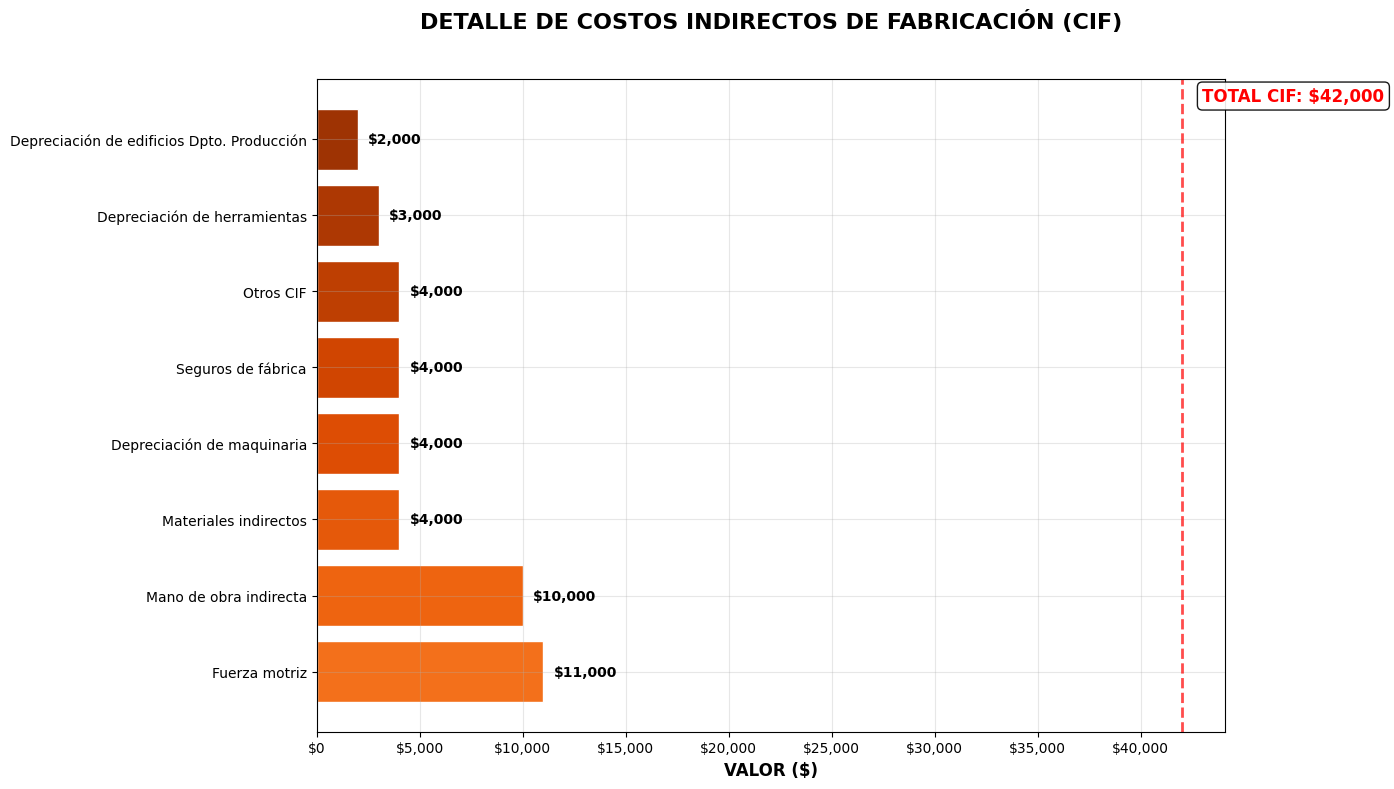

In [ ]:
# Gráfico  - Detalle de CIF (barras horizontales)
fig, ax = plt.subplots(figsize=(14, 8))

# Ordenar CIF por valor
cif_items = list(datos["Costos Indirectos de Fabricación"].items())
cif_items.sort(key=lambda x: x[1], reverse=True)
conceptos = [item[0] for item in cif_items]
valores = [item[1] for item in cif_items]

# Crear colores degradados
colors_cif = cm.Oranges(np.linspace(0.6, 0.9, len(conceptos)))

bars = ax.barh(conceptos, valores, color=colors_cif, edgecolor='white', linewidth=1)

ax.set_title('DETALLE DE COSTOS INDIRECTOS DE FABRICACIÓN (CIF)\n', 
             fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('VALOR ($)', fontweight='bold', fontsize=12)

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars, valores)):
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2, 
            f'${val:,}', ha='left', va='center', 
            fontweight='bold', fontsize=10)

# Línea y texto del total CIF
ax.axvline(cif_total, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax.text(cif_total + 1000, len(conceptos)-0.5, 
        f'TOTAL CIF: ${cif_total:,}', 
        fontweight='bold', color='red', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

#### 3. Costo total de Producción
---

\begin{align*}
\text{Costo de Producción Total} &= \text{MPD} + \text{MOD} + \text{CIF} - \text{Inv. Inicial Proc.} \\
\end{align*}

Los gastos de administración ($2000) no forman parte del costo de producción, sino que son gastos del período.

In [31]:
# Costo de Producción Total = MP + MOD + CIF = Costo Primo + CIF
costo_produccion = costo_primo + cif_total
print("=" * 50)
print(f"\n✅ Costo de Producción Total (MP + MOD + CIF): ${costo_produccion:>,.2f}")
print("=" * 50)


✅ Costo de Producción Total (MP + MOD + CIF): $222,000.00


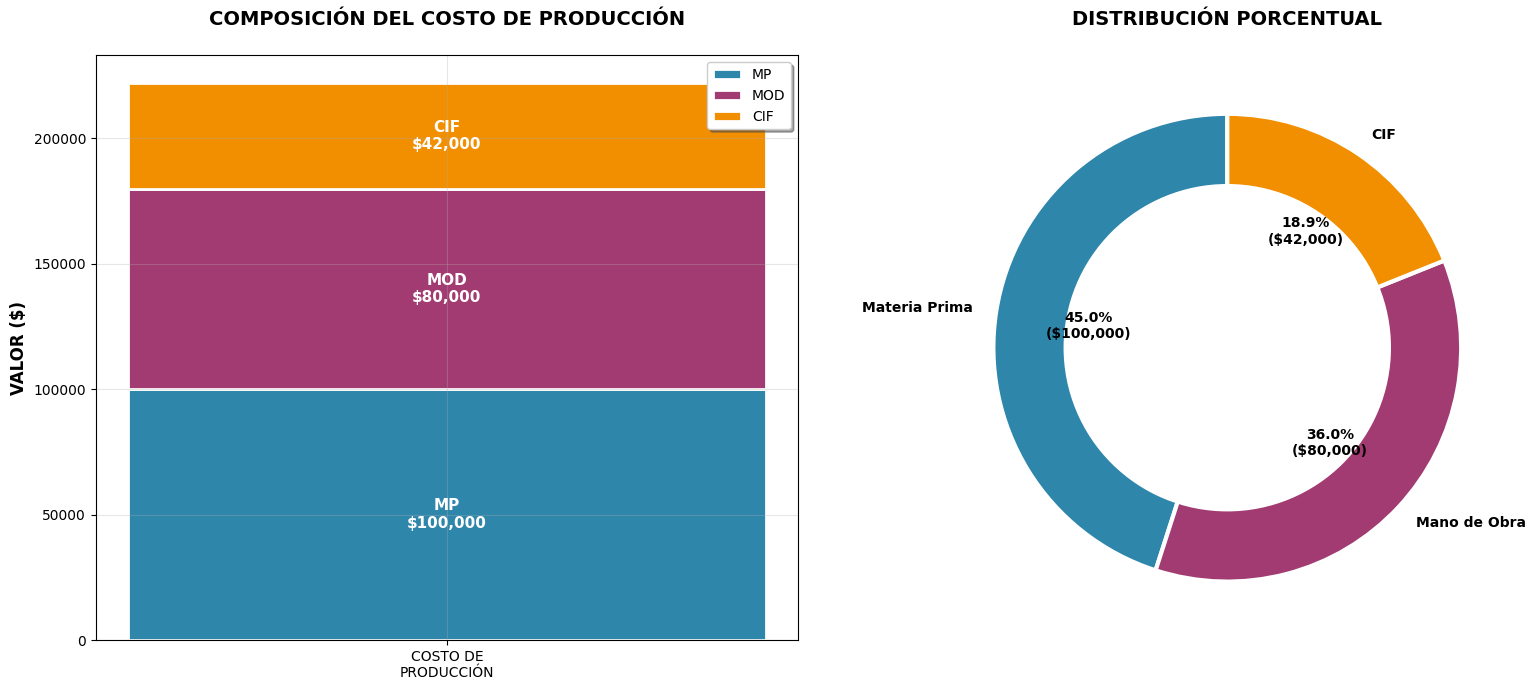

In [ ]:
# Gráfico 1 - Composición del Costo de Producción
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de barras apiladas
componentes = ['MP', 'MOD', 'CIF']
valores = [mp, mod, cif_total]
colors_comp = [mp_color, mod_color, cif_color]

bars = ax1.bar(['COSTO DE\nPRODUCCIÓN'], [mp], label='MP', color=mp_color, 
               edgecolor='white', linewidth=2)
ax1.bar(['COSTO DE\nPRODUCCIÓN'], [mod], bottom=[mp], label='MOD', color=mod_color,
        edgecolor='white', linewidth=2)
ax1.bar(['COSTO DE\nPRODUCCIÓN'], [cif_total], bottom=[mp + mod], label='CIF', 
        color=cif_color, edgecolor='white', linewidth=2)

ax1.set_ylabel('VALOR ($)', fontweight='bold', fontsize=12)
ax1.set_title('COMPOSICIÓN DEL COSTO DE PRODUCCIÓN\n', fontweight='bold', fontsize=14)
ax1.legend(loc='upper right', frameon=True, shadow=True)

# Añadir valores en las barras
ax1.text(0, mp/2, f'MP\n${mp:>,.0f}', ha='center', va='center', 
         fontweight='bold', color='white', fontsize=11)
ax1.text(0, mp + mod/2, f'MOD\n${mod:>,.0f}', ha='center', va='center', 
         fontweight='bold', color='white', fontsize=11)
ax1.text(0, mp + mod + cif_total/2, f'CIF\n${cif_total:>,.0f}', ha='center', va='center', 
         fontweight='bold', color='white', fontsize=11)

# Gráfico de donut
wedges, texts, autotexts = ax2.pie([mp, mod, cif_total], 
                                   labels=['Materia Prima', 'Mano de Obra', 'CIF'],
                                   autopct=lambda p: f'{p:.1f}%\n(${p*(mp+mod+cif_total)/100:,.0f})',
                                   startangle=90, 
                                   colors=[mp_color, mod_color, cif_color],
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 3},
                                   textprops={'fontsize': 10, 'fontweight': 'bold'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('DISTRIBUCIÓN PORCENTUAL\n', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

La estructura de costos muestra que la materia prima es el componente más significativo (45%), seguido por la mano de obra directa (36%). Los costos indirectos representan el 19% del total, siendo la mano de obra indirecta y la fuerza motriz los componentes más importantes del CIF.

#### 4. Costo Unitario
---
Para calcularlo, utilizamos:

- Costo Total de Producción = $222,000
- Unidades Producidas = 4,000 mesas

Utilizando la siguiente ecuación:
\begin{align*}
\text{Costo Unitario} &= \text{Costo Total de Producción} + \text{Unidades Producidas} \\
\end{align*}

In [33]:
# Costo Unitario
unidades = datos["Producción"]["Unidades producidas"]
costo_unitario = costo_produccion / unidades

print(f"\n✅ Costo Unitario de Producción: ${costo_unitario:,.2f} por mesa")
print(f"   - Unidades producidas: {unidades:,} mesas")


✅ Costo Unitario de Producción: $55.50 por mesa
   - Unidades producidas: 4,000 mesas


El costo unitario de $55.50 por mesa servirá como base para la fijación de precios de venta y el análisis de rentabilidad.

#### Definición de datos

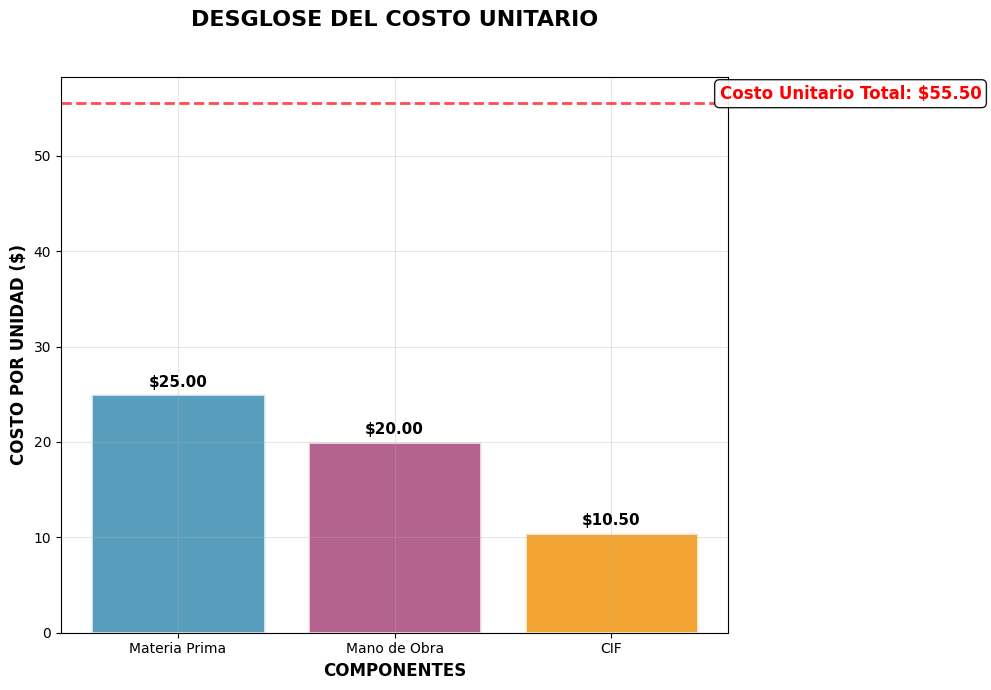

In [34]:
# Gráfico  - Análisis de Costo Unitario
fig, ax = plt.subplots(figsize=(10, 7))

componentes = ['Materia Prima', 'Mano de Obra', 'CIF']
costos_unitarios = [
    mp / unidades,
    mod / unidades,
    cif_total / unidades
]
colors_unit = [mp_color, mod_color, cif_color]

bars = ax.bar(componentes, costos_unitarios, color=colors_unit, 
              edgecolor='white', linewidth=2, alpha=0.8)

ax.set_title('DESGLOSE DEL COSTO UNITARIO\n', fontweight='bold', fontsize=16, pad=20)
ax.set_ylabel('COSTO POR UNIDAD ($)', fontweight='bold', fontsize=12)
ax.set_xlabel('COMPONENTES', fontweight='bold', fontsize=12)

# Añadir valores en las barras
for bar, costo in zip(bars, costos_unitarios):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, 
            f'${costo:.2f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

# Línea del costo unitario total
ax.axhline(y=costo_unitario, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.text(len(componentes)-0.5, costo_unitario + 0.5, 
        f'Costo Unitario Total: ${costo_unitario:.2f}', 
        fontweight='bold', color='red', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

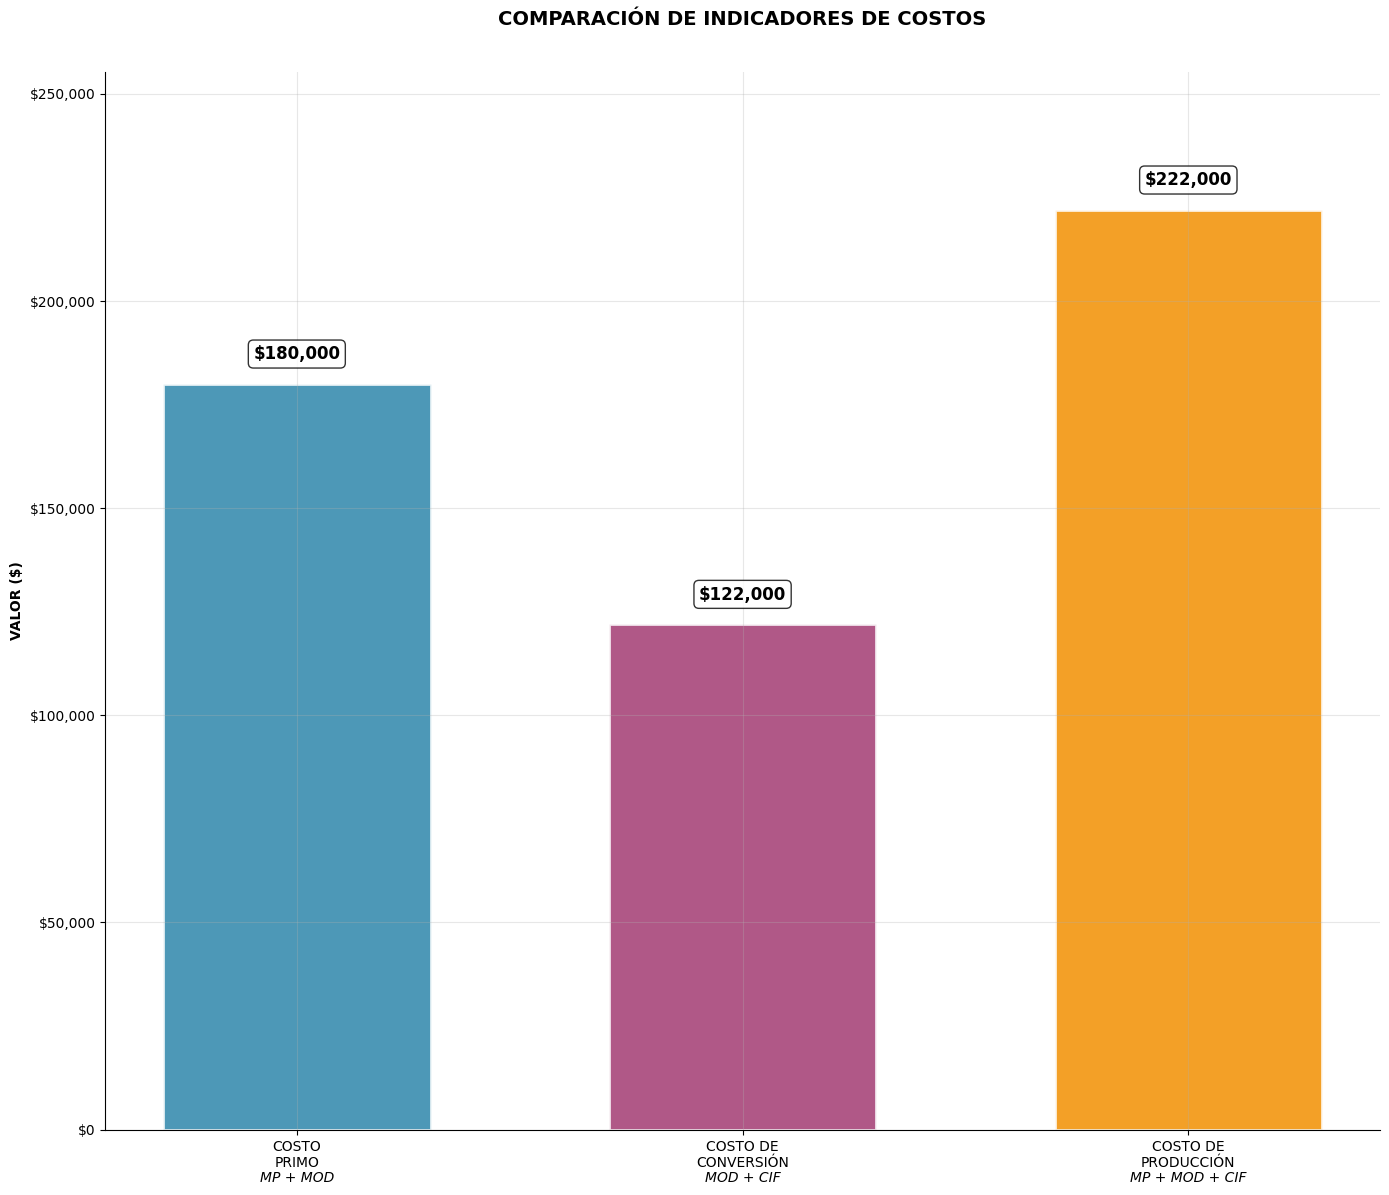

In [42]:
#  Gráfico  - Comparación de Indicadores de Costos (3D EFFECT)
fig, ax = plt.subplots(figsize=(14, 12))

conceptos = ['COSTO\nPRIMO', 'COSTO DE\nCONVERSIÓN', 'COSTO DE\nPRODUCCIÓN']
valores = [costo_primo, costo_conversion, costo_produccion]

# Barras con efecto 3D
bars = ax.bar(conceptos, valores, 
              color=[mp_color, mod_color, cif_color], 
              edgecolor='white', linewidth=2,
              alpha=0.85, 
              width=0.6)

ax.set_title('COMPARACIÓN DE INDICADORES DE COSTOS\n', fontweight='bold', fontsize=14, pad=18)
ax.set_ylabel('VALOR ($)', fontweight='bold', fontsize=10)

# Etiquetas con formato profesional
for bar, val, concepto in zip(bars, valores, conceptos):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5000, 
            f'${val:,}', ha='center', va='bottom', 
            fontweight='bold', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Fórmula debajo de cada barra
    if concepto == 'COSTO\nPRIMO':
        formula = 'MP + MOD'
    elif concepto == 'COSTO DE\nCONVERSIÓN':
        formula = 'MOD + CIF'
    else:
        formula = 'MP + MOD + CIF'
    
    ax.text(bar.get_x() + bar.get_width()/2., -10000, 
            formula, ha='center', va='top', 
            fontstyle='italic', fontsize=10)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0, max(valores) * 1.15)

plt.tight_layout()
plt.show()

### Exportación de resultados

In [ ]:
# Crear DataFrames para exportación
df_directos = crear_df_detalle("Costos Directos", "COSTOS DIRECTOS")
df_cif = crear_df_detalle("Costos Indirectos de Fabricación", "CIF")
df_gastos = crear_df_detalle("Gastos de Administración", "GASTOS ADMINISTRACIÓN")

df_resultados = pd.DataFrame({
    'Indicador': [
        'Costo Primo (MP + MOD)',
        'Costo de Conversión (MOD + CIF)',
        'Costo de Producción Total (MP + MOD + CIF)',
        'Costo Unitario de Producción'
    ],
    'Valor ($)': [
        costo_primo,
        costo_conversion,
        costo_produccion,
        costo_unitario
    ],
    'Fórmula': [
        'Materia Prima + Mano de Obra Directa',
        'Mano de Obra Directa + CIF',
        'Costo Primo + CIF',
        'Costo Producción / Unidades'
    ],
    'Unidades': [
        '-',
        '-',
        '-',
        f'{unidades} mesas'
    ]
})

# Exportar a Excel
with pd.ExcelWriter('resultados_actividad_4.xlsx') as writer:
    df_directos.to_excel(writer, sheet_name='Costos_Directos', index=False)
    df_cif.to_excel(writer, sheet_name='Costos_Indirectos', index=False)
    df_gastos.to_excel(writer, sheet_name='Gastos_Administracion', index=False)
    df_resultados.to_excel(writer, sheet_name='Resumen_Resultados', index=False)

print("✅ Resultados exportados a 'resultados_actividad_4.xlsx'")

✅ Resultados exportados a 'resultados_actividad_4.xlsx'
